In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/hjmesa/Dengue/master/init.py
from init import init; init(force_download=False)

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib notebook 
#sns.set(style='whitegrid')

In [3]:
# Cargar el archivo de datos

FILE = 'local/data/DATOS_MENSUALES/DATOS_MENSUALES_ESTACIONES_NINO.csv'

dataset = pd.read_csv(FILE, header=0, index_col=False)


# Eliminar información no requerida para el analisis por curva endemica.  Solo se deja el año, 
# el mes y el numero de casos confirmados
dataset = dataset.drop(["PTPM_CON","HRA2_AUT_60_MEAN","HRA2_AUT_60_AMAX","HRA2_AUT_60_AMIN","TA2_AUT_60_MEAN",
                        "TA2_AUT_60_AMAX","TA2_AUT_60_AMIN","NINO1+2","ANOM","NINO3","ANOM.1","NINO4","ANOM.2",
                        "NINO3.4","ANOM.3","ALL_CASES"], axis=1)

# Eliminar los registros 0 y 1 que son de 2006 y no se encuentra la serie anual completa e igual con el registro 146 
# que es el unico de 2019
dataset = dataset.drop([0, 1, 146],axis=0)


# Se carga un arreglo con todos los datos

values = dataset.values
values = values.astype('float64')

Canal = np.zeros((11,12))
Datos = np.zeros((12))

k=0
for i in range (0,11):
    for j in range (0,12):
        Canal[i][j]=values[k][2]
        k=k+1

j=0
for i in range (k,k+12):
    Datos[j]=values[i][2]
    j=j+1



In [4]:
df = DataFrame(Canal)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,50.0,74.0,94.0,72.0,95.0,105.0,74.0,64.0,70.0,110.0,54.0,49.0
1,21.0,43.0,59.0,52.0,63.0,60.0,57.0,52.0,65.0,58.0,63.0,75.0
2,69.0,73.0,79.0,137.0,184.0,239.0,358.0,556.0,597.0,610.0,466.0,535.0
3,593.0,1041.0,1011.0,572.0,487.0,409.0,326.0,311.0,267.0,188.0,188.0,130.0
4,99.0,79.0,67.0,39.0,64.0,50.0,57.0,75.0,48.0,55.0,35.0,45.0
5,113.0,105.0,151.0,83.0,70.0,74.0,96.0,78.0,100.0,104.0,121.0,174.0
6,381.0,646.0,775.0,1637.0,1411.0,1053.0,1213.0,713.0,539.0,393.0,292.0,285.0
7,405.0,222.0,173.0,213.0,202.0,204.0,274.0,247.0,192.0,215.0,197.0,194.0
8,351.0,407.0,314.0,327.0,352.0,314.0,345.0,254.0,204.0,215.0,217.0,406.0
9,779.0,1080.0,937.0,808.0,649.0,502.0,342.0,215.0,145.0,136.0,114.0,143.0


In [5]:
X=df.describe()
X

,0,1,2,3,4,5,6,7,8,9,10,11
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,273.090909,352.727273,338.363636,363.818182,330.545455,278.909091,289.727273,236.727273,206.454545,192.090909,160.727273,187.363636
std,249.245443,394.432273,376.768171,489.389991,408.835264,299.282293,334.174832,221.261877,192.932819,172.364993,132.545910,161.884695
min,21.000000,43.000000,59.000000,39.000000,59.000000,50.000000,45.000000,39.000000,44.000000,29.000000,21.000000,25.000000
25%,84.000000,76.500000,73.000000,67.000000,67.000000,67.000000,65.500000,69.500000,67.500000,81.000000,58.500000,62.000000
50%,143.000000,110.000000,151.000000,137.000000,184.000000,204.000000,274.000000,215.000000,145.000000,136.000000,121.000000,143.000000
75%,393.000000,526.500000,544.500000,449.500000,419.500000,361.500000,343.500000,282.500000,235.500000,215.000000,207.000000,239.500000
max,779.000000,1080.000000,1011.000000,1637.000000,1411.000000,1053.000000,1213.000000,713.000000,597.000000,610.000000,466.000000,535.000000


In [6]:
time=np.zeros(12)
MAX=np.zeros(12)
Q1=np.zeros(12)
Q2=np.zeros(12)
Q3=np.zeros(12)
max_canal=np.max(Canal)
max_datos=np.max(Datos)
maximo=np.max([max_canal,max_datos])

for i in range (0,12):
    MAX[i] = maximo
    time[i] = i+1
    Q1[i] = X[i][4]
    Q2[i] = X[i][5]
    Q3[i] = X[i][6]
    

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 
         'Noviembre', 'Diciembre']

area=pd.DataFrame()

area['Zona de epidemia'],area['Zona de alarma'],area['Zona de seguridad'],area['Zona de exito']=[MAX,Q3,Q2,Q1]


area['time']=time
area=area.set_index('time');


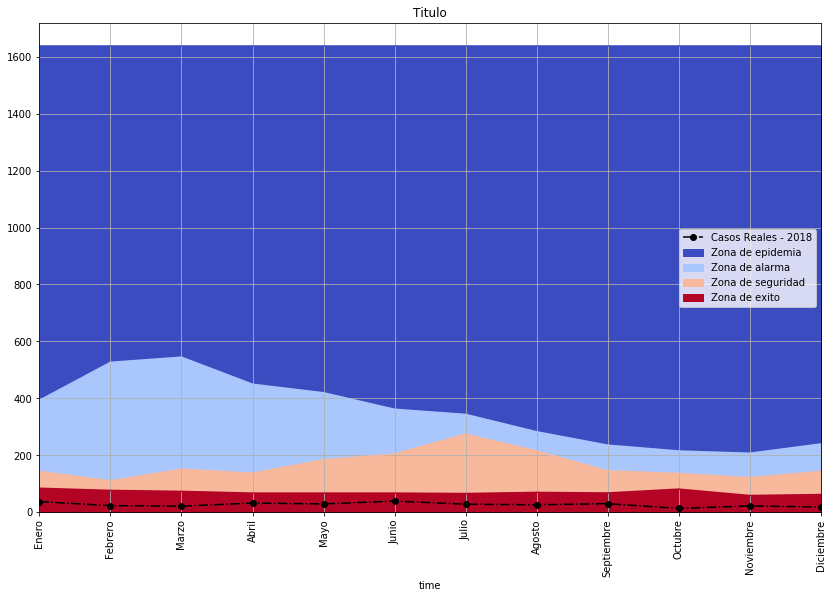

In [7]:
pronostico = pd.read_csv('local/data/pronostico_M.csv', header=0, index_col=False)
pronosticos = pronostico.values
plt.rcParams['figure.figsize'] = [14.0, 9.0]

#Graficar el canal endemico
area.plot.area(x_compat=True,stacked=False,colormap='coolwarm',alpha=1,title="Titulo")


#Curva con Datos reales del 2018
plt.plot(time,Datos,'-.ok',label=r'Casos Reales - 2018')

#Curva con Datos pronosticados para 2018
#plt.plot(time,pronostico,'--or',label='Pronostico');

plt.xticks(rotation=90,labels=meses,ticks=time);
plt.grid();
plt.legend();